In [1]:
import pandas as pd  # Import thư viện pandas để xử lý dữ liệu
import seaborn as sns  # Import thư viện seaborn để tạo các biểu đồ thống kê

# Đọc dữ liệu từ file CSV vào DataFrame, sử dụng các tham số:
# header=0: Dòng đầu tiên là tên cột
# delimiter=',': Dấu phân cách là dấu phẩy
# encoding='utf-8': Mã hóa UTF-8 cho dữ liệu văn bản
df = pd.read_csv('dulieuxettuyendaihoc.csv',
                 header=0, delimiter=',',
                 encoding='utf-8')


In [2]:

# Chọn các cột cần thiết từ DataFrame
df = df[['GT', 'DT', 'KV', 'KT', 'M1',
         'M2', 'M3',
         'NGAYTHI', 'DINHHUONGNGHENGHIEP']]

# Data Manipulation
df.info()  # Hiển thị thông tin tổng quan về DataFrame, bao gồm số lượng dòng, cột, kiểu dữ liệu, và các giá trị null


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   GT                   100 non-null    object 
 1   DT                   3 non-null      float64
 2   KV                   100 non-null    object 
 3   KT                   100 non-null    object 
 4   M1                   100 non-null    float64
 5   M2                   100 non-null    float64
 6   M3                   100 non-null    float64
 7   NGAYTHI              100 non-null    object 
 8   DINHHUONGNGHENGHIEP  100 non-null    object 
dtypes: float64(4), object(5)
memory usage: 7.2+ KB


In [3]:

# Đổi tên các cột để dễ sử dụng hơn
df.rename(columns={'NGAYTHI': 'NT',
                   'DINHHUONGNGHENGHIEP': 'NGHE'}, 
                   inplace=True)

df.head(5)  # Hiển thị 5 dòng đầu tiên của DataFrame


,GT,DT,KV,KT,M1,M2,M3,NT,NGHE
0,F,NaN,2NT,A1,3.25,3.25,4.50,12/7/2018,No
1,M,NaN,1,C,6.00,4.00,3.50,12/7/2018,Yes
2,M,NaN,1,C,5.00,6.75,4.00,12/7/2018,No
3,M,NaN,1,D1,4.25,4.25,5.25,12/7/2018,No
4,M,NaN,2NT,A,4.25,4.50,5.00,12/7/2018,No


In [4]:

df.dropna(how='all', inplace=True)  # Xóa các dòng chứa tất cả các giá trị là NaN


In [5]:

df.drop_duplicates(inplace=True)  # Xóa các dòng trùng lặp


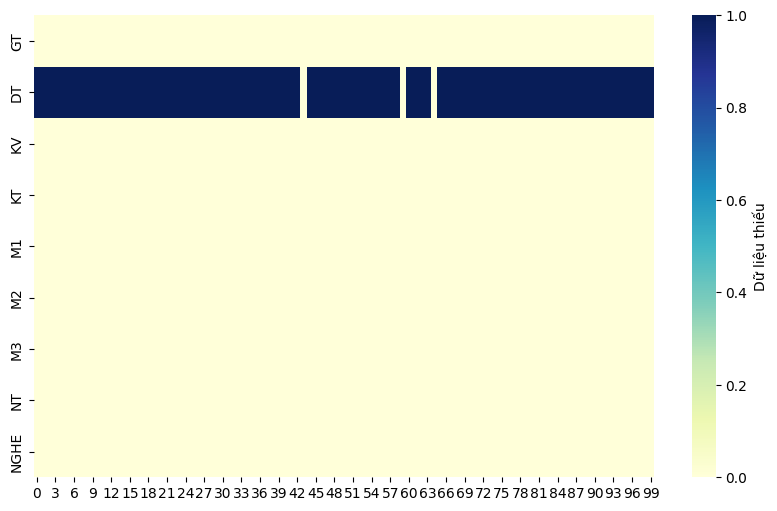

In [6]:

import matplotlib.pyplot as plt  # Import thư viện matplotlib để vẽ biểu đồ
plt.figure(figsize=(10,6))  # Đặt kích thước của hình vẽ
sns.heatmap(df.isna().transpose(), cmap='YlGnBu',
            cbar_kws={'label': 'Dữ liệu thiếu'})  
# Vẽ heatmap hiển thị vị trí các giá trị thiếu trong DataFrame

plt.savefig('missingdata.png', dpi=100)  # Lưu heatmap vào file hình ảnh với độ phân giải 100 dpi
plt.show()  # Hiển thị heatmap


In [7]:

# Điền các giá trị thiếu với các phương pháp khác nhau cho từng cột
df['DT'].fillna('KINH', inplace=True)  # Điền giá trị thiếu của cột 'DT' bằng 'KINH'
df['M1'].fillna(df['M1'].mean(), inplace=True)  # Điền giá trị thiếu của cột 'M1' bằng giá trị trung bình của cột
df['M2'].fillna(df['M2'].median(), inplace=True)  # Điền giá trị thiếu của cột 'M2' bằng giá trị trung vị của cột
df['M3'].fillna(0, inplace=True)  # Điền giá trị thiếu của cột 'M3' bằng 0

df['TBM'] = (df['M1'] + df['M2'] + df['M3']) / 3  # Tính trung bình của ba cột 'M1', 'M2', 'M3' và lưu vào cột 'TBM'

df  # Hiển thị DataFrame sau khi thêm cột 'TBM'


C:\Users\Star\AppData\Local\Temp\ipykernel_18144\2713270529.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['DT'].fillna('KINH', inplace=True)  # Điền giá trị thiếu của cột 'DT' bằng 'KINH'
C:\Users\Star\AppData\Local\Temp\ipykernel_18144\2713270529.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'KINH' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['DT'].fillna('KINH', inplace=True)  # Đi

,GT,DT,KV,KT,M1,M2,M3,NT,NGHE,TBM
0,F,KINH,2NT,A1,3.25,3.25,4.50,12/7/2018,No,3.666667
1,M,KINH,1,C,6.00,4.00,3.50,12/7/2018,Yes,4.500000
2,M,KINH,1,C,5.00,6.75,4.00,12/7/2018,No,5.250000
3,M,KINH,1,D1,4.25,4.25,5.25,12/7/2018,No,4.583333
4,M,KINH,2NT,A,4.25,4.50,5.00,12/7/2018,No,4.583333
...,...,...,...,...,...,...,...,...,...,...
95,F,KINH,1,C,5.25,1.50,6.25,7/20/2022,Yes,4.333333
96,F,KINH,1,C,5.25,3.75,4.75,7/20/2022,No,4.583333
97,M,KINH,2NT,C,7.00,8.00,4.00,7/20/2022,Yes,6.333333
98,M,KINH,1,C,5.00,3.50,5.50,7/20/2022,No,4.666667


In [8]:

# Phân loại theo cột 'TBM' và tạo cột 'XL' với các giá trị phân loại
df.loc[df['TBM'] < 5.0, 'XL'] = 'FAIL'
df.loc[(df['TBM'] >= 5.0) & (df['TBM'] < 7.0), 'XL'] = 'FAIR'
df.loc[(df['TBM'] >= 7.0) & (df['TBM'] < 9.0), 'XL'] = 'GOOD'
df.loc[df['TBM'] >= 9.0, 'XL'] = 'EXCEL'

df  # Hiển thị DataFrame sau khi phân loại


,GT,DT,KV,KT,M1,M2,M3,NT,NGHE,TBM,XL
0,F,KINH,2NT,A1,3.25,3.25,4.50,12/7/2018,No,3.666667,FAIL
1,M,KINH,1,C,6.00,4.00,3.50,12/7/2018,Yes,4.500000,FAIL
2,M,KINH,1,C,5.00,6.75,4.00,12/7/2018,No,5.250000,FAIR
3,M,KINH,1,D1,4.25,4.25,5.25,12/7/2018,No,4.583333,FAIL
4,M,KINH,2NT,A,4.25,4.50,5.00,12/7/2018,No,4.583333,FAIL
...,...,...,...,...,...,...,...,...,...,...,...
95,F,KINH,1,C,5.25,1.50,6.25,7/20/2022,Yes,4.333333,FAIL
96,F,KINH,1,C,5.25,3.75,4.75,7/20/2022,No,4.583333,FAIL
97,M,KINH,2NT,C,7.00,8.00,4.00,7/20/2022,Yes,6.333333,FAIR
98,M,KINH,1,C,5.00,3.50,5.50,7/20/2022,No,4.666667,FAIL


In [9]:

# Tạo từ điển ánh xạ từ giá trị cột 'KT' sang nhóm mới
dict_map = {
    'A1': 'G1', 'C': 'G3', 'D1': 'G3', 'A': 'G1', 'B': 'G2'
}
df['NHOM'] = df['KT'].map(dict_map)  # Ánh xạ các giá trị của cột 'KT' sang giá trị tương ứng trong từ điển

df  # Hiển thị DataFrame sau khi ánh xạ


,GT,DT,KV,KT,M1,M2,M3,NT,NGHE,TBM,XL,NHOM
0,F,KINH,2NT,A1,3.25,3.25,4.50,12/7/2018,No,3.666667,FAIL,G1
1,M,KINH,1,C,6.00,4.00,3.50,12/7/2018,Yes,4.500000,FAIL,G3
2,M,KINH,1,C,5.00,6.75,4.00,12/7/2018,No,5.250000,FAIR,G3
3,M,KINH,1,D1,4.25,4.25,5.25,12/7/2018,No,4.583333,FAIL,G3
4,M,KINH,2NT,A,4.25,4.50,5.00,12/7/2018,No,4.583333,FAIL,G1
...,...,...,...,...,...,...,...,...,...,...,...,...
95,F,KINH,1,C,5.25,1.50,6.25,7/20/2022,Yes,4.333333,FAIL,G3
96,F,KINH,1,C,5.25,3.75,4.75,7/20/2022,No,4.583333,FAIL,G3
97,M,KINH,2NT,C,7.00,8.00,4.00,7/20/2022,Yes,6.333333,FAIR,G3
98,M,KINH,1,C,5.00,3.50,5.50,7/20/2022,No,4.666667,FAIL,G3


In [10]:

# Định nghĩa hàm để xác định giá trị 'PLUS' dựa trên các điều kiện
def fplus(x, y):
    if (x == 'G1' or x == 'G2') and (y >= 4.0):
        return 1.0
    else:
        return 0.0

df['PLUS'] = list(map(fplus, df['NHOM'], df['TBM']))  # Áp dụng hàm fplus cho các giá trị của cột 'NHOM' và 'TBM' để tạo cột 'PLUS'

df  # Hiển thị DataFrame sau khi thêm cột 'PLUS'


,GT,DT,KV,KT,M1,M2,M3,NT,NGHE,TBM,XL,NHOM,PLUS
0,F,KINH,2NT,A1,3.25,3.25,4.50,12/7/2018,No,3.666667,FAIL,G1,0.0
1,M,KINH,1,C,6.00,4.00,3.50,12/7/2018,Yes,4.500000,FAIL,G3,0.0
2,M,KINH,1,C,5.00,6.75,4.00,12/7/2018,No,5.250000,FAIR,G3,0.0
3,M,KINH,1,D1,4.25,4.25,5.25,12/7/2018,No,4.583333,FAIL,G3,0.0
4,M,KINH,2NT,A,4.25,4.50,5.00,12/7/2018,No,4.583333,FAIL,G1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,F,KINH,1,C,5.25,1.50,6.25,7/20/2022,Yes,4.333333,FAIL,G3,0.0
96,F,KINH,1,C,5.25,3.75,4.75,7/20/2022,No,4.583333,FAIL,G3,0.0
97,M,KINH,2NT,C,7.00,8.00,4.00,7/20/2022,Yes,6.333333,FAIR,G3,0.0
98,M,KINH,1,C,5.00,3.50,5.50,7/20/2022,No,4.666667,FAIL,G3,0.0


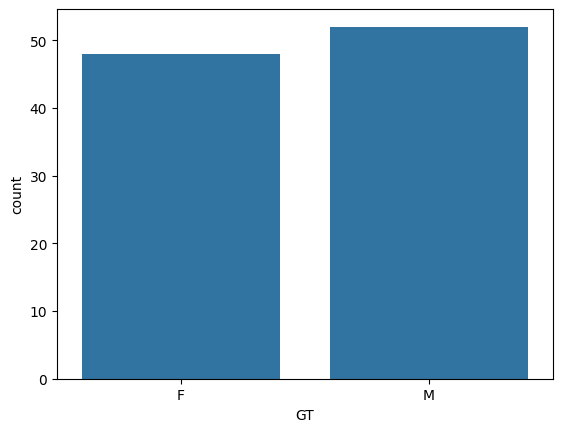

In [11]:

# Data Visualization
sns.countplot(x='GT', data=df)  # Vẽ biểu đồ cột đếm số lượng theo cột 'GT'
plt.show()  # Hiển thị biểu đồ


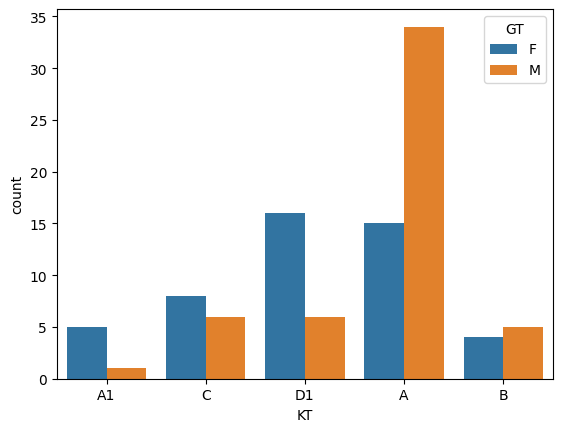

In [12]:

sns.countplot(x='KT', hue='GT', data=df)  # Vẽ biểu đồ cột đếm số lượng theo cột 'KT', phân loại theo 'GT'
plt.show()  # Hiển thị biểu đồ


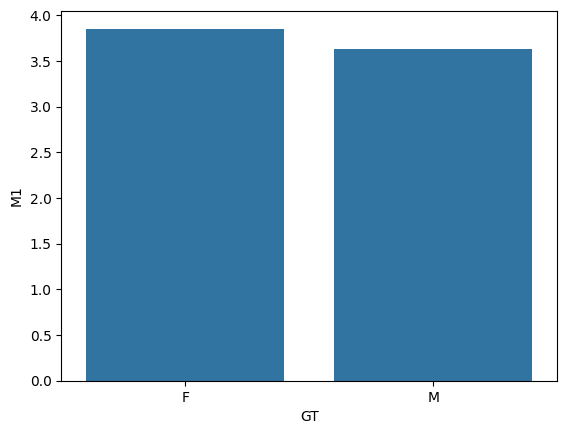

In [13]:

sns.barplot(x='GT', y='M1', data=df, errorbar=None)  # Vẽ biểu đồ cột với 'GT' trên trục x và giá trị của 'M1' trên trục y
plt.show()  # Hiển thị biểu đồ


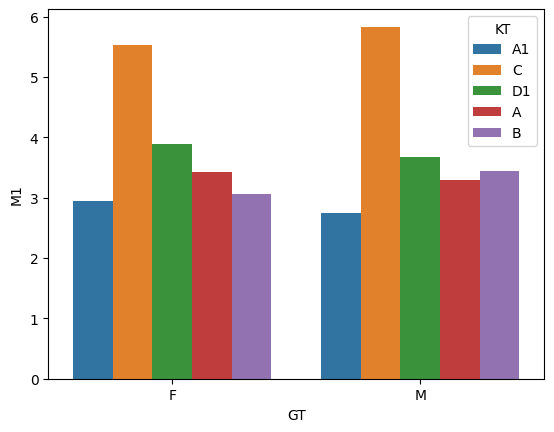

In [14]:

sns.barplot(x='GT', y='M1', hue='KT', data=df, errorbar=None)  # Vẽ biểu đồ cột với 'GT' trên trục x và giá trị của 'M1' trên trục y, phân loại theo 'KT'
plt.show()  # Hiển thị biểu đồ


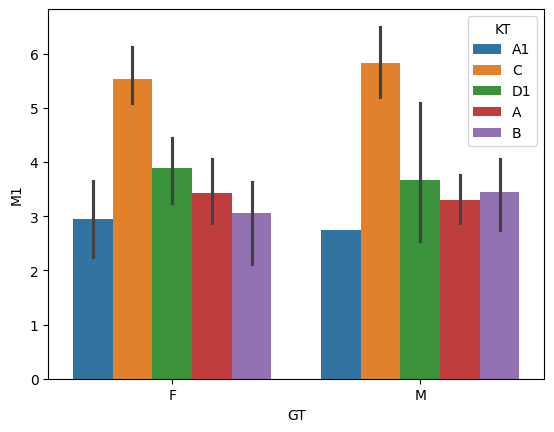

In [15]:

sns.barplot(x='GT', y='M1', hue='KT', data=df)  # Vẽ biểu đồ cột với 'GT' trên trục x và giá trị của 'M1' trên trục y, phân loại theo 'KT'
plt.show()  # Hiển thị biểu đồ


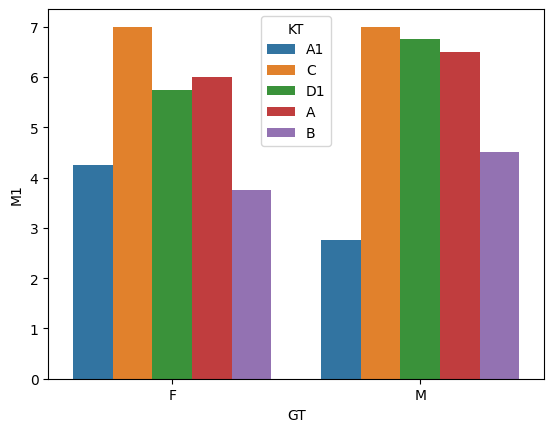

In [16]:

sns.barplot(x='GT', y='M1', hue='KT', data=df, 
            errorbar=None, estimator=max)  # Vẽ biểu đồ cột với 'GT' trên trục x và giá trị của 'M1' trên trục y, sử dụng giá trị lớn nhất (max) cho các nhóm
plt.show()  # Hiển thị biểu đồ


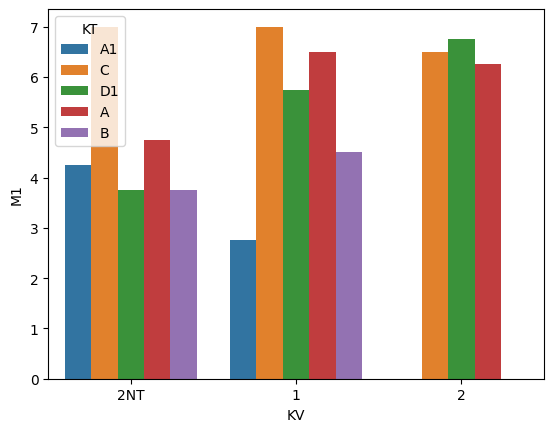

In [17]:

import numpy as np  # Import thư viện numpy để sử dụng các hàm số học
sns.barplot(x='KV', y='M1', hue='KT', 
            data=df, errorbar=None, estimator=np.max)  
# Vẽ biểu đồ cột với 'KV' trên trục x và giá trị của 'M1' trên trục y, sử dụng giá trị lớn nhất (max) cho các nhóm
plt.show()  # Hiển thị biểu đồ


In [18]:

# Nhóm dữ liệu theo cột 'KT' và đếm số lượng trong mỗi nhóm
gb = df.groupby(['KT'])['KT'].agg(['count'])


In [19]:

labels = gb.index  # Lấy các nhãn từ chỉ mục của nhóm
data = list(gb['count'])  # Lấy số lượng các giá trị trong mỗi nhóm


In [20]:

colors = sns.color_palette('pastel')  # Tạo bảng màu pastel


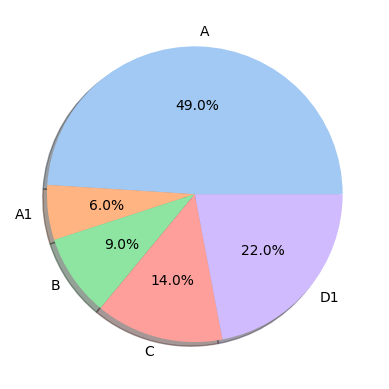

In [21]:

# Vẽ biểu đồ tròn để hiển thị tỷ lệ các nhóm trong cột 'KT'
plt.pie(data, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True)
plt.show()  # Hiển thị biểu đồ


In [22]:

# Nhóm dữ liệu theo cột 'KV' và tính tổng của cột 'PLUS'
gb = df.groupby(['KV'])['PLUS'].agg(['sum'])


In [23]:

labels = gb.index  # Lấy các nhãn từ chỉ mục của nhóm
data = list(gb['sum'])  # Lấy tổng các giá trị trong mỗi nhóm


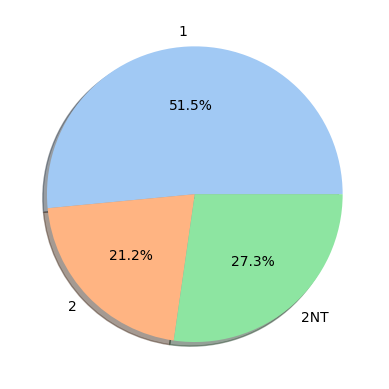

In [24]:

colors = sns.color_palette('pastel')  # Tạo bảng màu pastel
# Vẽ biểu đồ tròn để hiển thị tổng các giá trị của cột 'PLUS' theo nhóm 'KV'
plt.pie(data, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.show()  # Hiển thị biểu đồ


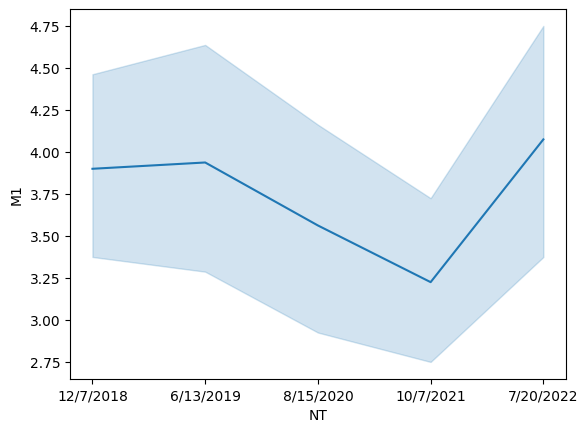

In [25]:

sns.lineplot(x='NT', y='M1', data=df)  # Vẽ biểu đồ đường với 'NT' trên trục x và giá trị của 'M1' trên trục y
plt.show()  # Hiển thị biểu đồ


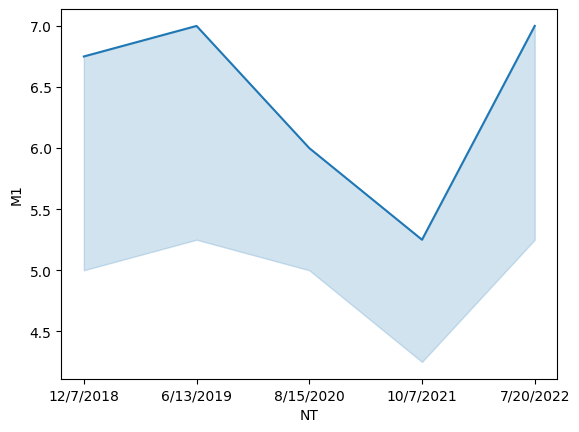

In [26]:

sns.lineplot(x='NT', y='M1', data=df, estimator=np.max)  # Vẽ biểu đồ đường với 'NT' trên trục x và giá trị lớn nhất (max) của 'M1' trên trục y
plt.show()  # Hiển thị biểu đồ


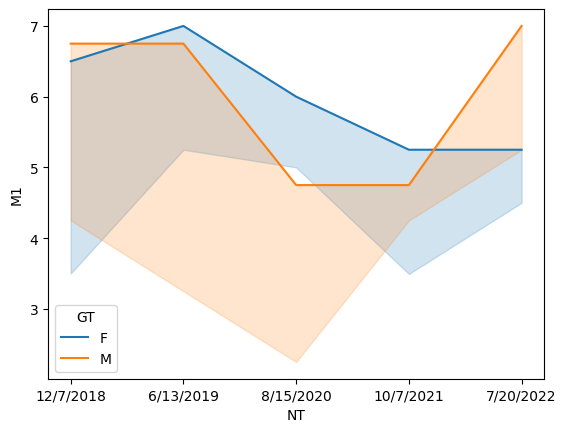

In [27]:

sns.lineplot(x='NT', y='M1', hue='GT', 
             data=df, estimator=np.max)  # Vẽ biểu đồ đường với 'NT' trên trục x và giá trị lớn nhất (max) của 'M1' trên trục y, phân loại theo 'GT'
plt.show()  # Hiển thị biểu đồ
